 # Power Load Prediction for West Zone - Linear Model (Quarterly)

In [260]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [261]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_84915/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [262]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [263]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [264]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [265]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [266]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity']].copy() 

In [267]:
power_data_west_mod.head()

,end,demand,temp,humidity
0,2019-01-29 00:15:00,844.8,54.0,21
1,2019-01-29 00:30:00,841.6,54.0,21
2,2019-01-29 00:45:00,832.0,54.0,21
3,2019-01-29 01:00:00,848.0,54.0,21
4,2019-01-29 01:15:00,812.8,55.0,21


In [268]:
power_data_west_mod.describe()

,demand,temp,humidity
count,104596.000000,104588.00000,104608.000000
mean,1238.634456,67.39232,52.635401
std,302.399419,16.59371,22.815913
min,0.000000,29.00000,3.000000
25%,1008.000000,54.00000,34.000000
50%,1232.000000,66.00000,49.000000
75%,1472.000000,79.00000,70.000000
max,2124.800000,114.00000,100.000000


In [269]:
power_data_west_mod.shape

(104608, 4)

In [270]:
power_data_west_qtly = power_data_west_mod.resample('Q', on='end').agg({'demand':'sum', 'temp':'mean', 'humidity':'mean'})

In [271]:
power_data_west_qtly['end'] = power_data_west_qtly.index.values

In [272]:
power_data_west_qtly['quarter'] = power_data_west_qtly['end'].dt.quarter

In [273]:
power_data_west_qtly.drop('end', 1, inplace=True)

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_84915/2783807632.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  power_data_west_qtly.drop('end', 1, inplace=True)


In [274]:
power_data_west_qtly.describe()

,demand,temp,humidity,quarter
count,1.300000e+01,13.000000,13.000000,13.000000
mean,9.965862e+06,66.115318,53.331253,2.384615
std,3.207562e+06,12.698211,10.254680,1.192928
min,2.618046e+06,51.747030,37.459805,1.000000
25%,8.979346e+06,53.864393,45.836081,1.000000
50%,1.077279e+07,60.796896,55.716690,2.000000
75%,1.218011e+07,73.382440,59.303342,3.000000
max,1.351031e+07,84.757926,71.088725,4.000000


In [275]:
power_data_west_qtly

,demand,temp,humidity,quarter
end,,,,
2019-03-31,5004710.40,53.864393,71.088725,1
2019-06-30,10772790.41,72.402816,55.716690,2
2019-09-30,12180112.00,82.823256,42.513474,3
2019-12-31,8979345.58,58.638536,47.412138,4
2020-03-31,7780897.60,53.278732,61.558837,1
2020-06-30,9817627.19,72.590087,57.026213,2
2020-09-30,13510313.60,84.310009,39.112885,3
2020-12-31,11457713.60,60.796896,54.671422,4
2021-03-31,10223300.79,53.209349,65.707865,1


In [276]:
for i in range(1, 3):
    power_data_west_qtly["demand_lag_{}".format(i)] = power_data_west_qtly['demand'].shift(i)
    power_data_west_qtly["temp_lag_{}".format(i)] = power_data_west_qtly['temp'].shift(i)
    power_data_west_qtly["humidity_lag_{}".format(i)] = power_data_west_qtly['humidity'].shift(i)

In [277]:
power_data_west_qtly.head(10)

,demand,temp,humidity,quarter,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2
end,,,,,,,,,,
2019-03-31,5004710.40,53.864393,71.088725,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,10772790.41,72.402816,55.716690,2,5004710.40,53.864393,71.088725,NaN,NaN,NaN
2019-09-30,12180112.00,82.823256,42.513474,3,10772790.41,72.402816,55.716690,5004710.40,53.864393,71.088725
2019-12-31,8979345.58,58.638536,47.412138,4,12180112.00,82.823256,42.513474,10772790.41,72.402816,55.716690
2020-03-31,7780897.60,53.278732,61.558837,1,8979345.58,58.638536,47.412138,12180112.00,82.823256,42.513474
2020-06-30,9817627.19,72.590087,57.026213,2,7780897.60,53.278732,61.558837,8979345.58,58.638536,47.412138
2020-09-30,13510313.60,84.310009,39.112885,3,9817627.19,72.590087,57.026213,7780897.60,53.278732,61.558837
2020-12-31,11457713.60,60.796896,54.671422,4,13510313.60,84.310009,39.112885,9817627.19,72.590087,57.026213
2021-03-31,10223300.79,53.209349,65.707865,1,11457713.60,60.796896,54.671422,13510313.60,84.310009,39.112885


In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [279]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

dataset.kW.plot()

In [280]:
y = power_data_west_qtly.dropna()['demand']
X = power_data_west_qtly.dropna().drop(['demand'], axis=1)

In [281]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [282]:
X_train.shape

(7, 9)

In [283]:
y_train.shape

(7,)

In [284]:
X_test.shape

(4, 9)

In [285]:
y_test.shape

(4,)

In [286]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [287]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

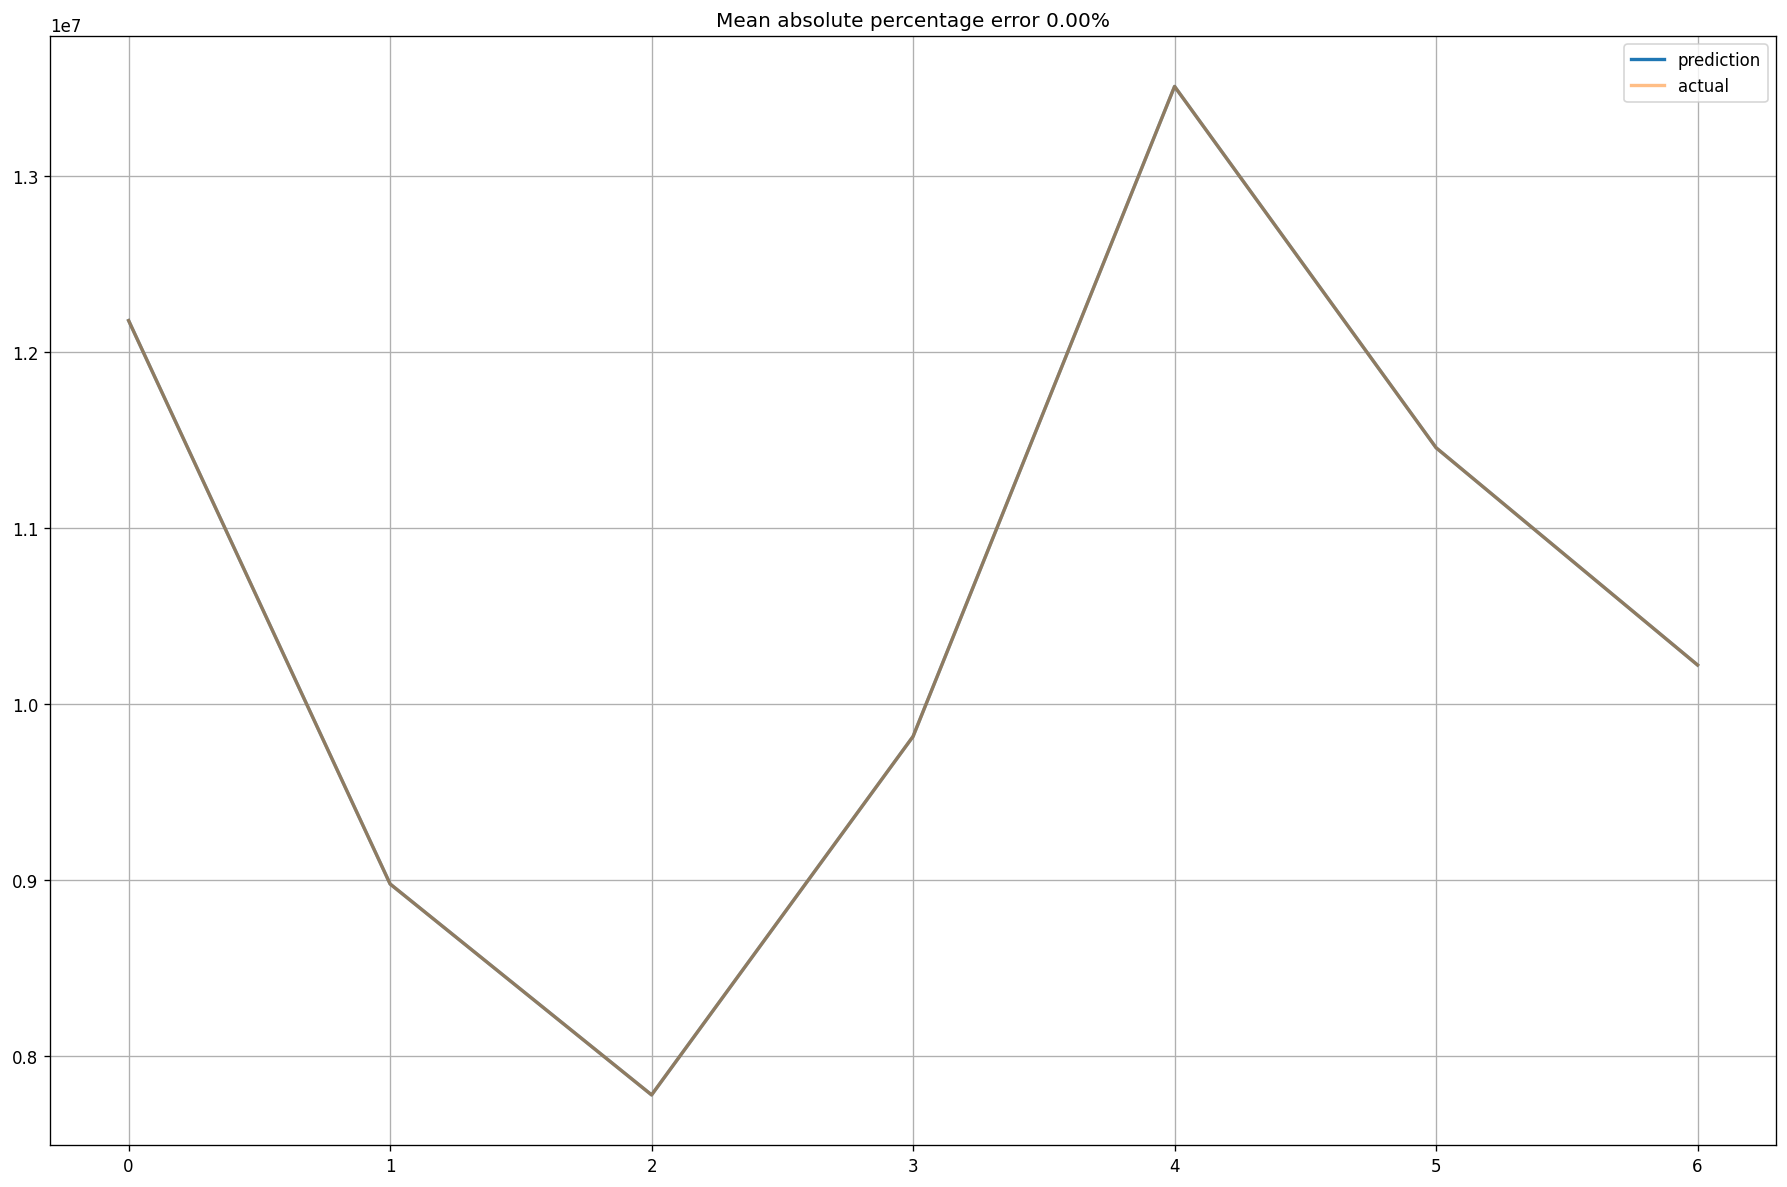

In [288]:
def plotModelTrainingResults(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_train)
    mae_error_var = mean_absolute_error(prediction, y_train)
    mse_error_var = mse_error(prediction, y_train)
    rmse_error_var = rmse_error(prediction, y_train)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(lr)

In [289]:
train_results['residual'] = train_results['Actual'] - train_results['Prediction']

In [290]:
train_results.tail(10)

,Actual,Prediction,residual
end,,,
2019-09-30,12180112.00,1.218011e+07,-0.000690
2019-12-31,8979345.58,8.979346e+06,0.000045
2020-03-31,7780897.60,7.780898e+06,0.000249
2020-06-30,9817627.19,9.817627e+06,0.000061
2020-09-30,13510313.60,1.351031e+07,-0.000104
2020-12-31,11457713.60,1.145771e+07,-0.000072
2021-03-31,10223300.79,1.022330e+07,0.000511


<AxesSubplot:xlabel='end'>

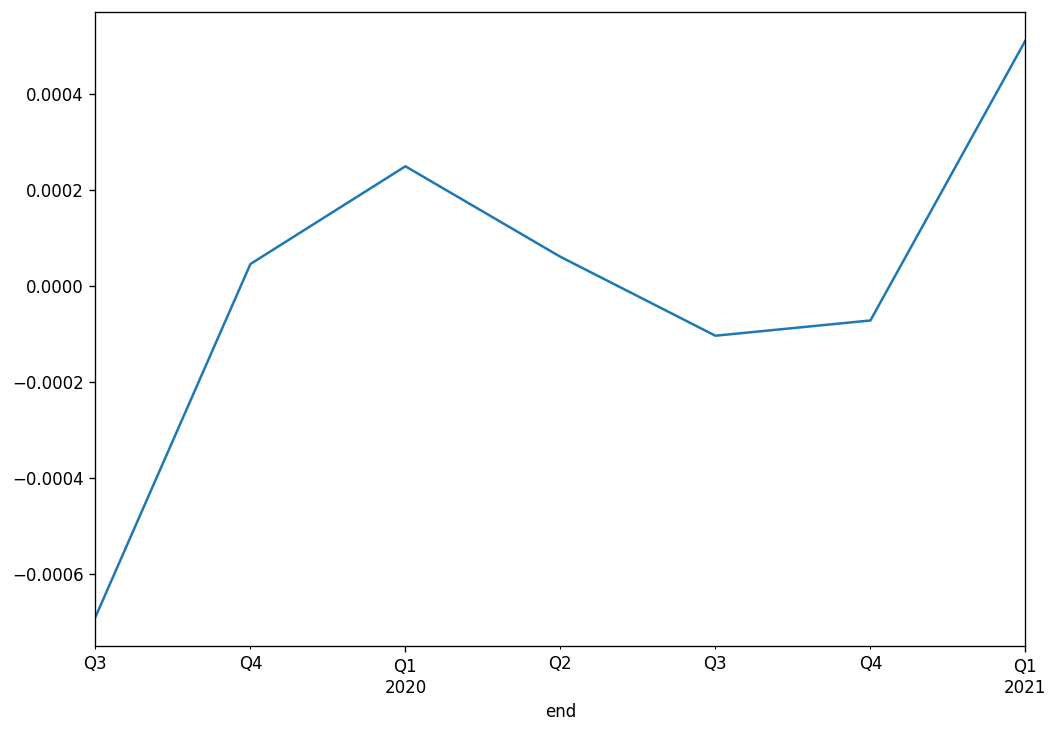

In [291]:
train_results['residual'].plot()

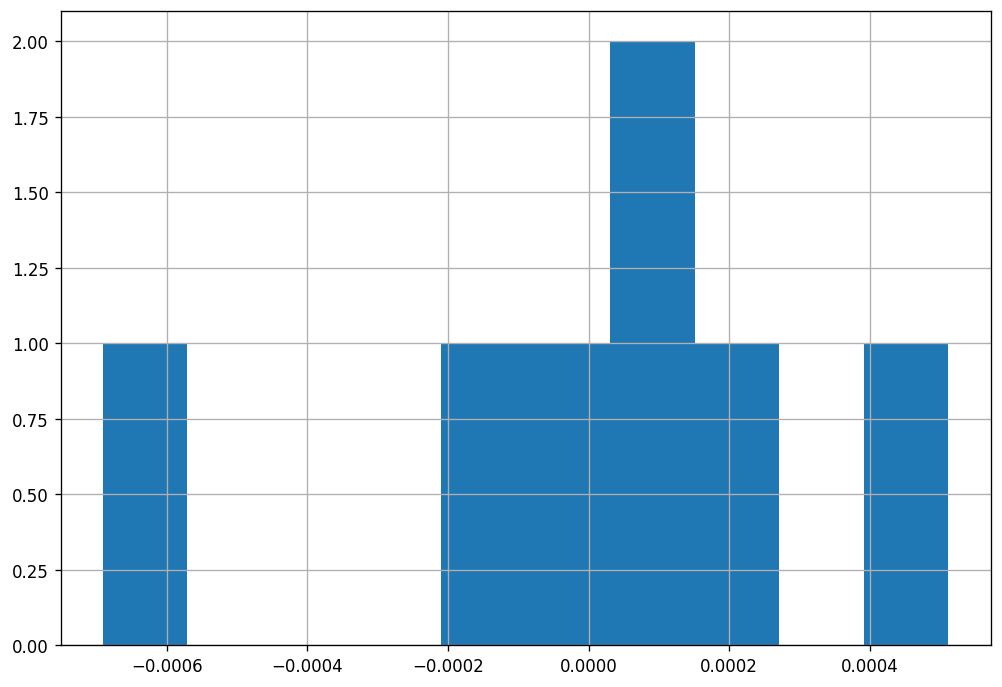

In [292]:
train_results['residual'].hist()
plt.show()

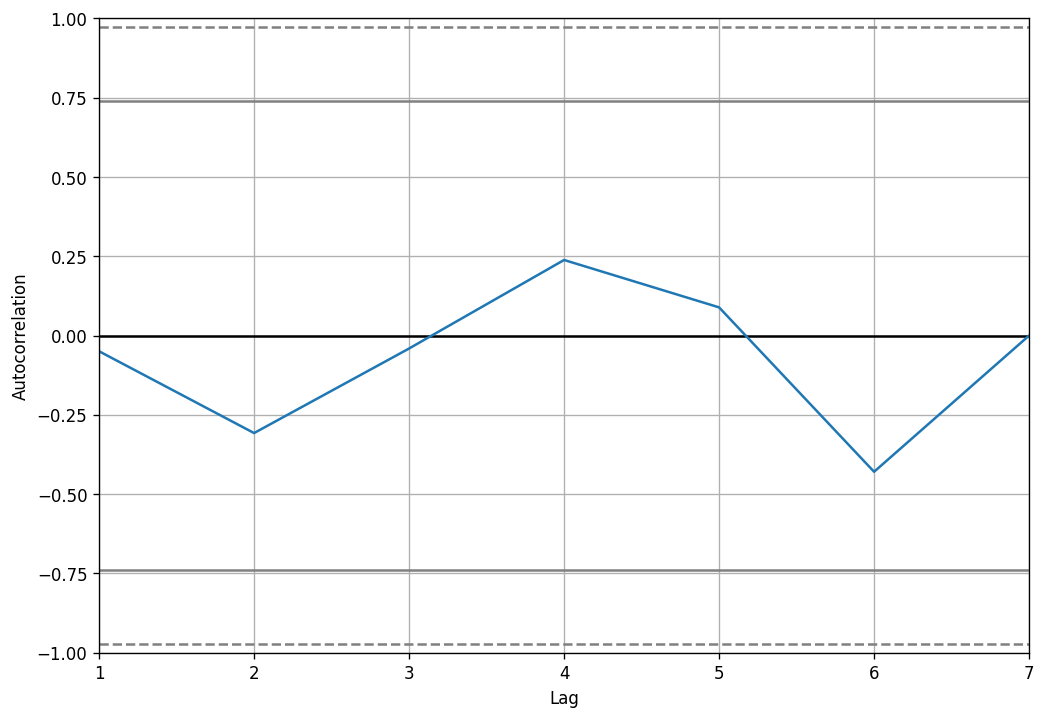

In [293]:
# autocorrelation
autocorrelation_plot(train_results['residual'])
plt.show()

In [294]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  2.342505871575433e-09
MAE:  0.00024762084441525597
MSE:  1.1745998077606187e-07
RMSE:  0.0003427243510112199


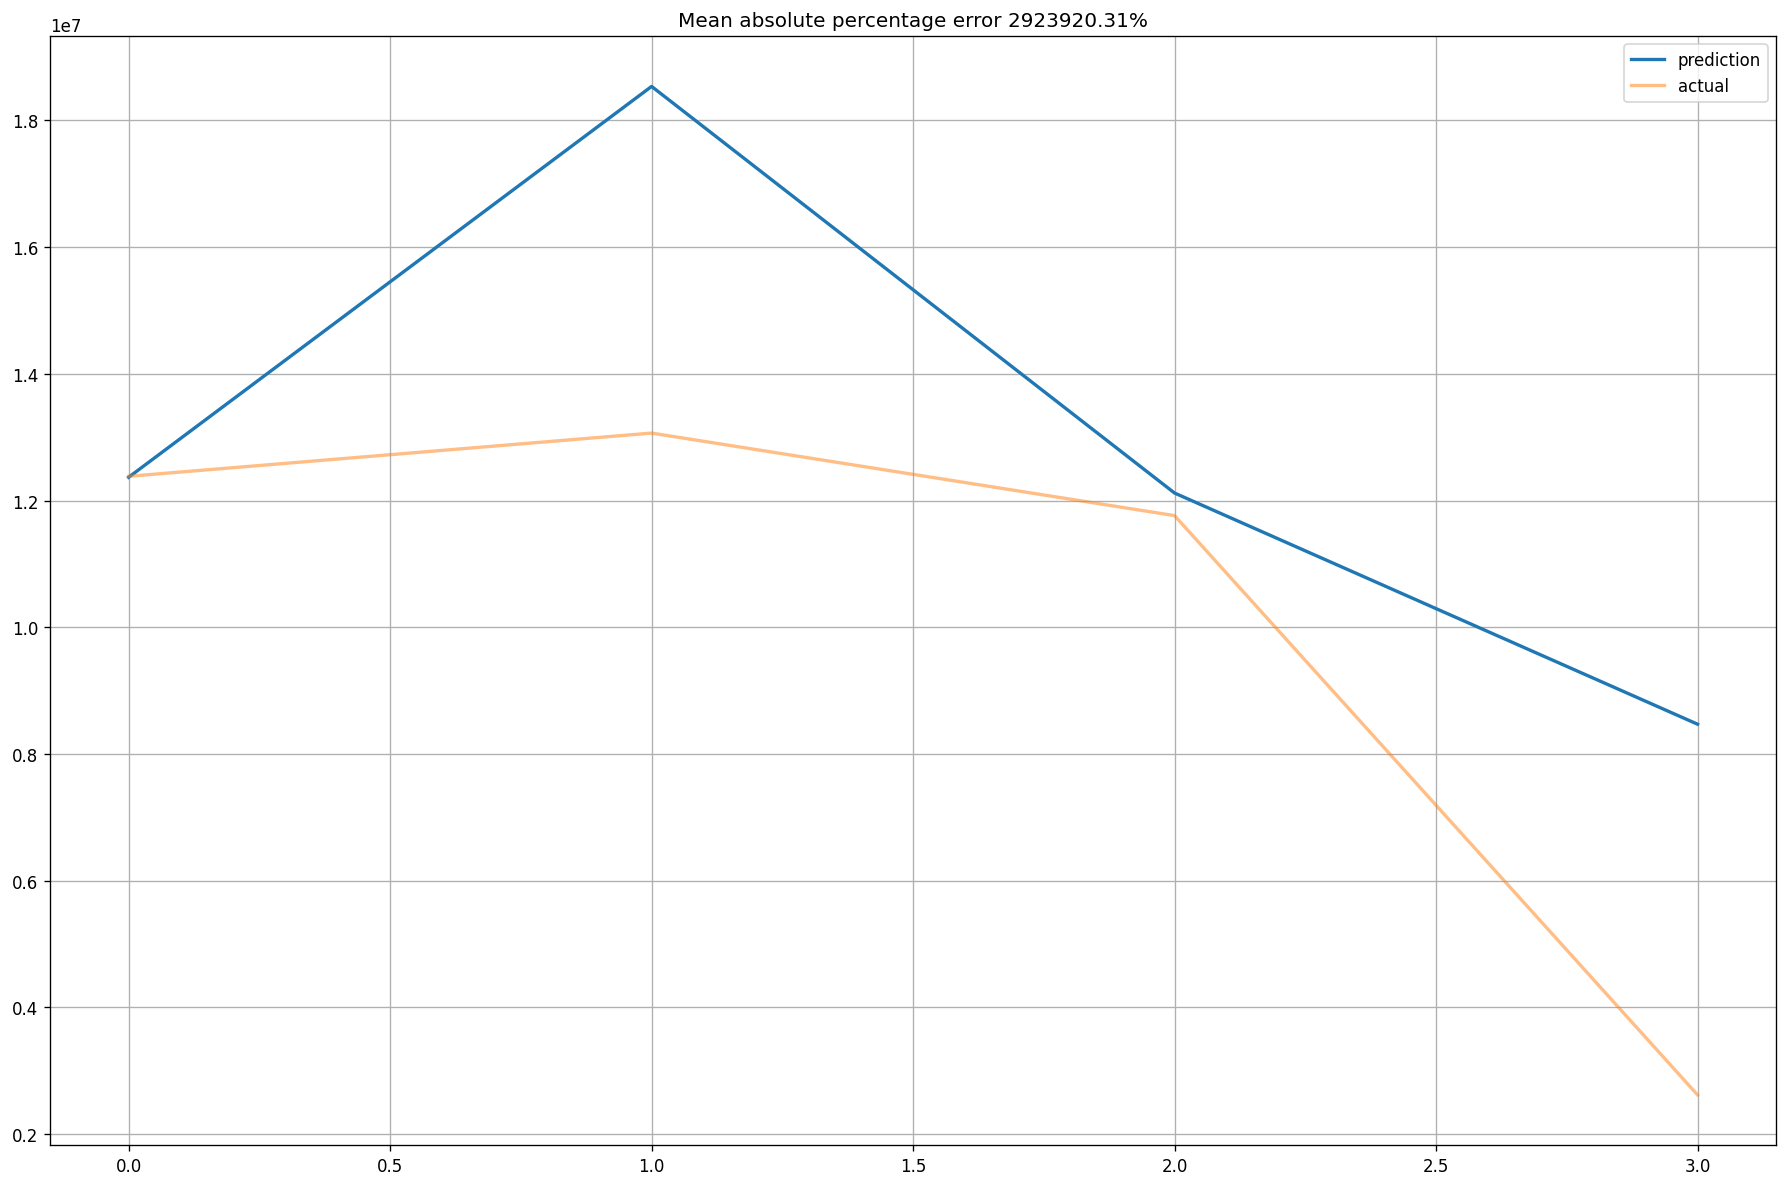

In [295]:
def plotModelPredictions(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_test)
    mae_error_var = mean_absolute_error(prediction, y_test)
    mse_error_var = mse_error(prediction, y_test)
    rmse_error_var = rmse_error(prediction, y_test)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(lr)

In [296]:
results['residual'] = results['Actual'] - results['Prediction']

In [297]:
results.tail(10)

,Actual,Prediction,residual
end,,,
2021-06-30,12383056.04,1.236795e+07,1.510393e+04
2021-09-30,13065548.80,1.853785e+07,-5.472296e+06
2021-12-31,11762747.20,1.211897e+07,-3.562194e+05
2022-03-31,2618046.38,8.470108e+06,-5.852061e+06


<AxesSubplot:xlabel='end'>

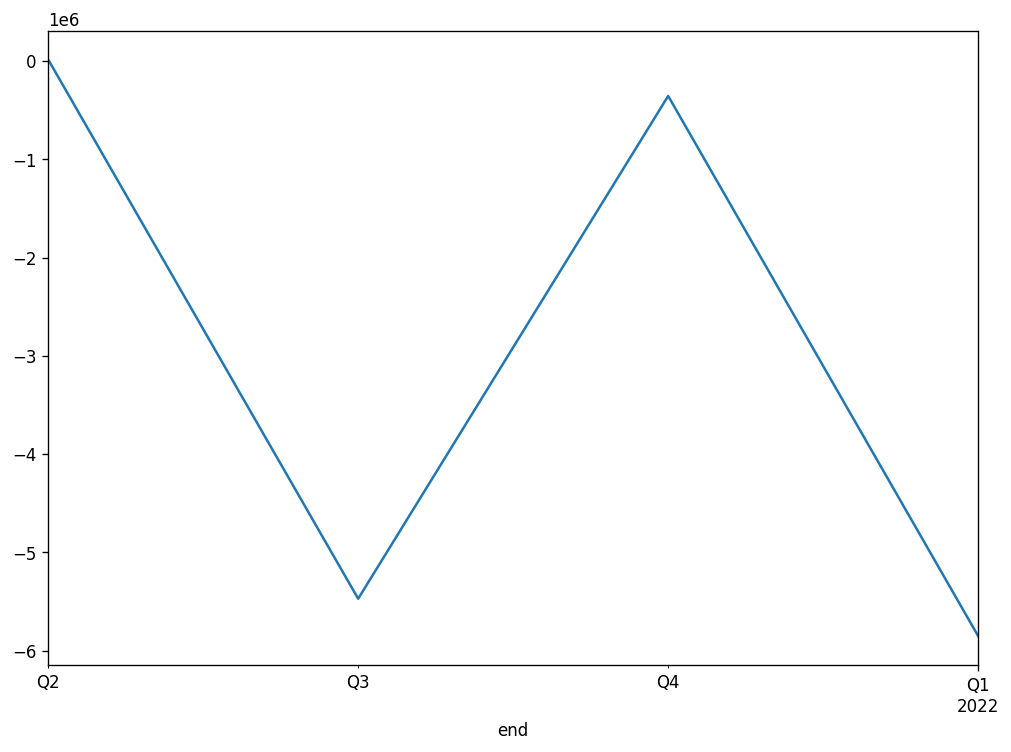

In [298]:
results['residual'].plot()

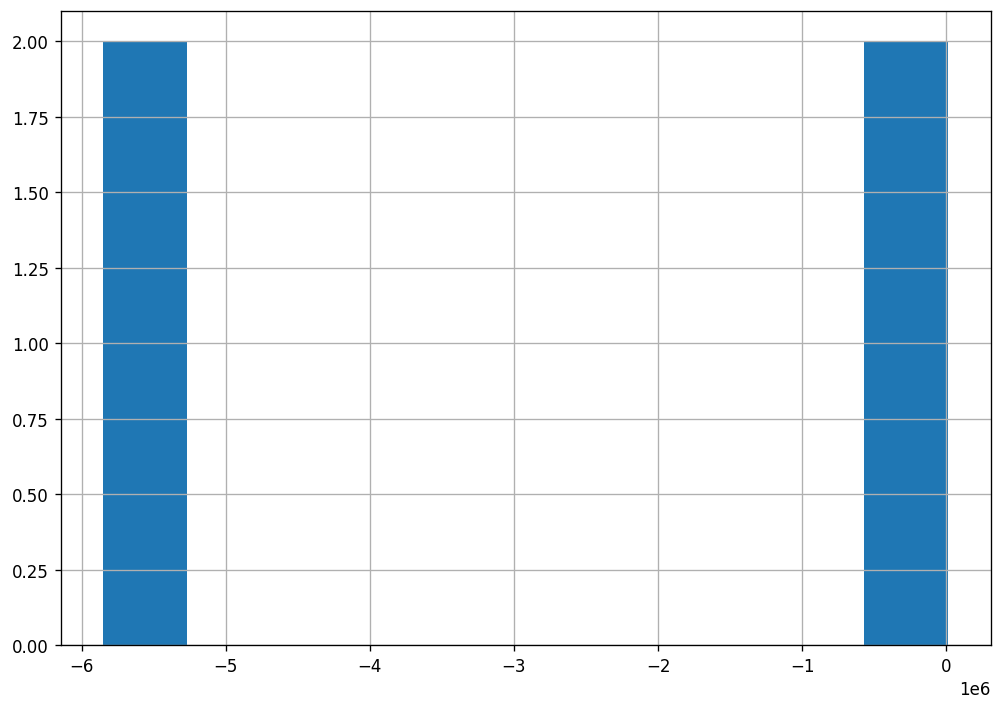

In [299]:
results['residual'].hist()
plt.show()

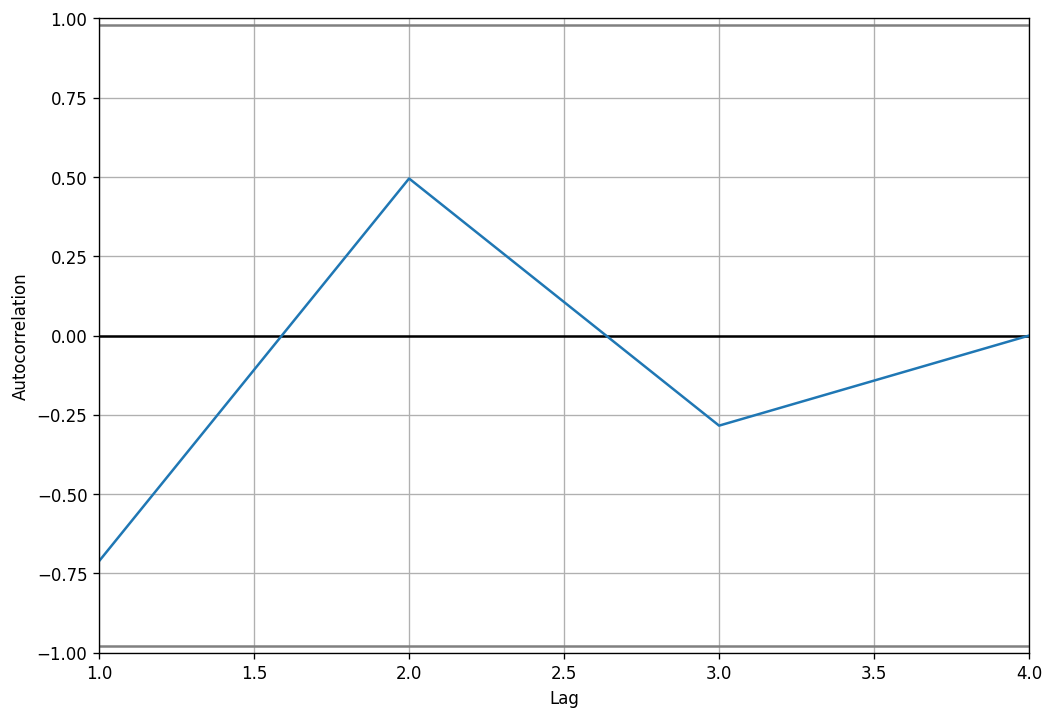

In [300]:
autocorrelation_plot(results['residual'])
plt.show()

In [301]:
print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  25.417956023626843
MAE:  2923920.3106565895
MSE:  16079943016076.809
RMSE:  4009980.4258969654


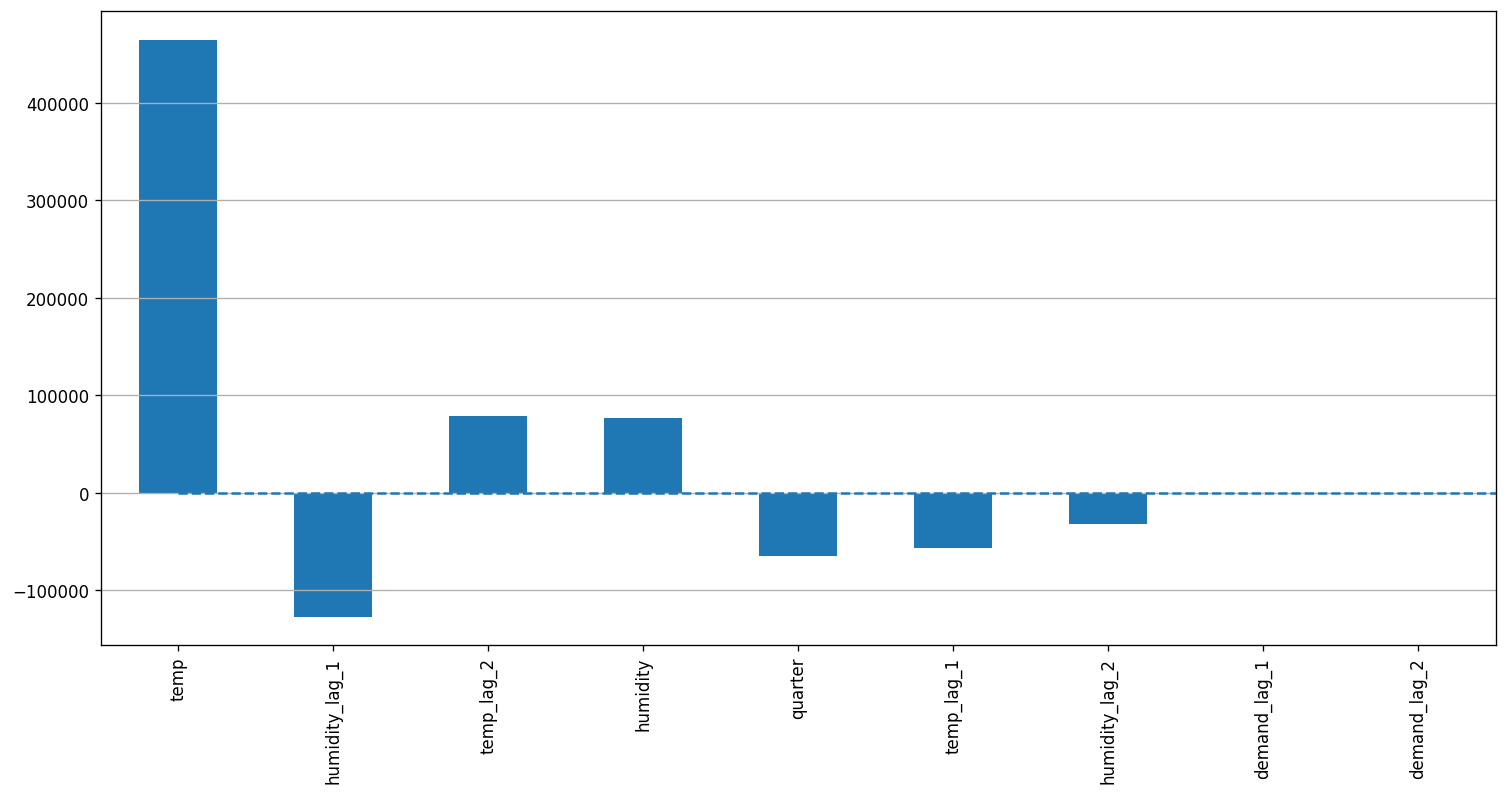

In [302]:
def plotCoefficients(model, maxDisplayValues=50):
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    plot_coefs = coefs.head(maxDisplayValues)
    
    plt.figure(figsize=(15, 7))
    plot_coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(plot_coefs), linestyles='dashed');

plotCoefficients(lr)